![Futuristic electric car charging](IMG_8807.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, it's essential to understand the growth trends in charging facilities and sales to inform strategic planning. As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. The data is stored in two CSV files:
___

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
private_ev_charging = pd.read_csv('private_ev_charging.csv')
public_ev_charging = pd.read_csv('public_ev_charging.csv')
ev_sales = pd.read_csv('ev_sales.csv')

# Drop missing values
private_ev_charging.dropna(inplace=True)
public_ev_charging.dropna(inplace=True)
ev_sales.dropna(inplace=True)

# Join the private and public charging DataFrames into one DataFrame called df_temp
df_temp= pd.merge(private_ev_charging, public_ev_charging, on="year", how="inner")

df_temp.head()


,year,private_ports,private_station_locations,public_ports,public_station_locations
0,2014,3695,1825,22470,9207
1,2015,4150,1962,26532,10710
2,2016,5763,2331,33165,13150
3,2017,6048,2370,45789,16170
4,2018,6812,2489,56842,19893


In [2]:
# Determine the total number of vehicles sold each year
ev_sales = ev_sales.groupby('year')['sales'].sum().reset_index()

# Join ev_sales to df_temp to create df_complete, keeping only the rows with complete data
df_complete = df_temp.merge(ev_sales, on='year', how='inner')

df_complete.head()


,year,private_ports,private_station_locations,public_ports,public_station_locations,sales
0,2014,3695,1825,22470,9207,118882.0
1,2015,4150,1962,26532,10710,114023.0
2,2016,5763,2331,33165,13150,159616.0
3,2017,6048,2370,45789,16170,195581.0
4,2018,6812,2489,56842,19893,361315.0


c:\Users\bmcki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bmcki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\bmcki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bmcki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

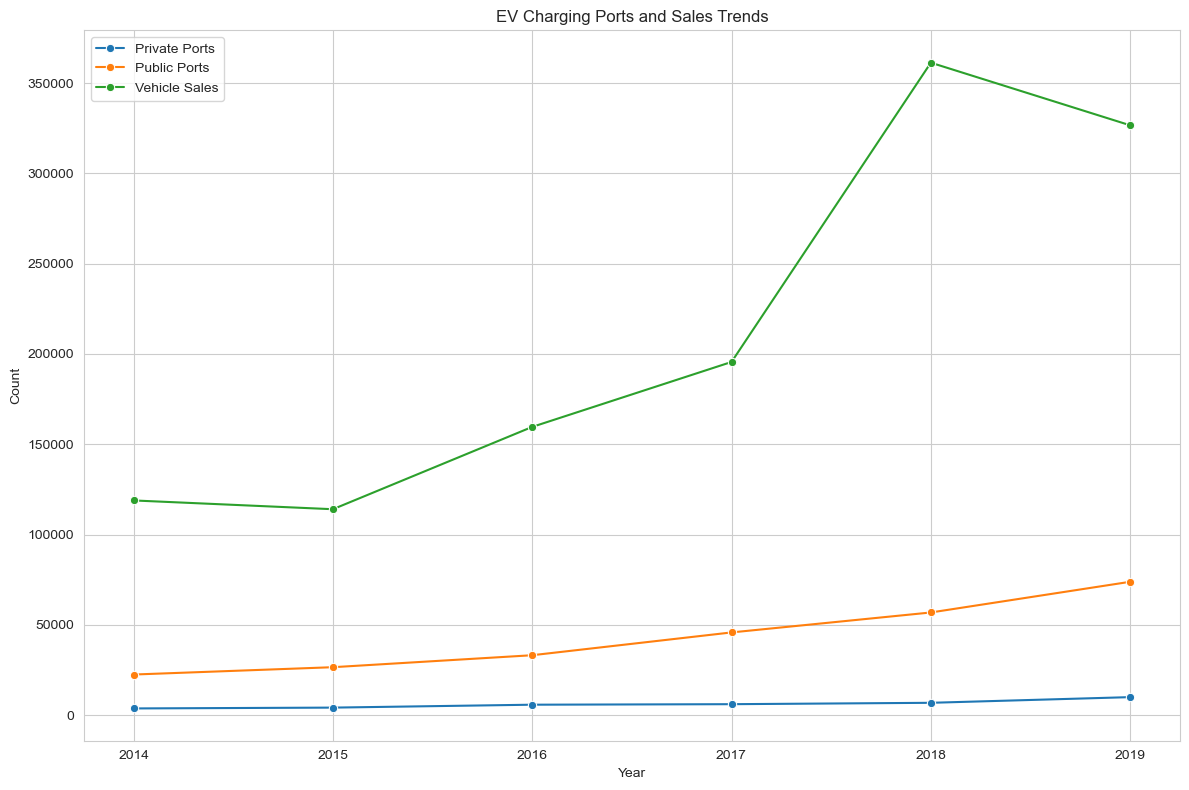

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'EV Charging Ports and Sales Trends'}, xlabel='Year', ylabel='Count'>)

In [3]:
# Plotting trends for private ports, public ports, and sales
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data
sns.lineplot(data=df_complete, x='year', y='private_ports', marker='o', label='Private Ports', ax=ax)
sns.lineplot(data=df_complete, x='year', y='public_ports', marker='o', label='Public Ports', ax=ax)
sns.lineplot(data=df_complete, x='year', y='sales', marker='o', label='Vehicle Sales', ax=ax)

# Setting the title, labels, and grid
ax.set_title('EV Charging Ports and Sales Trends')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.grid(True)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Return the fig, ax objects for further customization or saving
fig, ax


In [4]:
# Does increased electric vehicle sales lead to more "public" or "private" charging ports?

solution = "public"

In [5]:
# Dynamically determine the correlation to find the answer
correlation_private = df_complete['sales'].corr(df_complete['private_ports'])
correlation_public = df_complete['sales'].corr(df_complete['public_ports'])
solution = "private" if correlation_private > correlation_public else "public"

# Printing the solution
print(f"Solution: Increased EV sales lead to more {solution} charging ports.")

Solution: Increased EV sales lead to more public charging ports.
